epoch,train_loss,valid_loss,error_rate,time
0,0.169623,0.026632,0.008796,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.061147,0.021279,0.006089,00:35


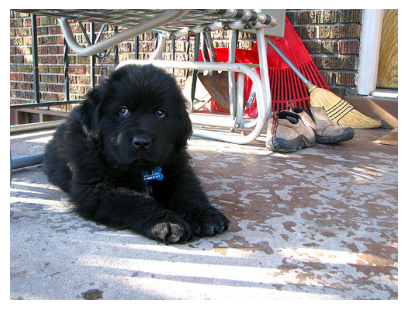

In [1]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'
images = get_image_files(path)
img = PILImage.create(images[0])
img.show()

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [6]:
from fastai.vision.all import *
import ipywidgets as widgets

btn_upload = widgets.FileUpload()
def on_upload_change(change):
    img = PILImage.create(btn_upload.value[0].content.tobytes())
    is_cat,_,probs=learn.predict(img)
    print(f"Is this a cat? {is_cat}")
    print(f"Probability it's a cat: {probs[1].item():.6f}")

btn_upload.observe(on_upload_change, names="value")
display(btn_upload)

FileUpload(value=(), description='Upload')

Is this a cat? False
Probability it's a cat: 0.000003
